In [1]:
## Load utilities
# Numpy: for scientific computing and arrays
import numpy as np
# Matplotlib: for plotting
import matplotlib.pyplot as plt

In [2]:
# Load data
filename = "ANN_7ksliced.pk"
data = np.load(filename)

In [3]:
dname = np.array(data[0]['dvarNames']) 
oname = np.array(data[0]['objNames']) 
dval  = np.asarray(data[1]['dvarValues'],dtype=np.float64) # convert string to float
oval  = np.asarray(data[1]['objValues'],dtype=np.float64)  
val   = np.concatenate((dval,oval),axis=1) # concatenate

In [4]:
# Most correlation with energy
G1     = dval[:,3]
G0     = dval[:,2] # second most correlation
energy = oval[:,7]

In [5]:
G1_b = np.c_[np.ones((len(G1),1)),G1, G0] # 1's, G1, G0
theta_best = np.linalg.inv(G1_b.T.dot(G1_b)).dot(G1_b.T).dot(energy)
print(theta_best)

[-0.05649721  0.40556749  0.10560798]


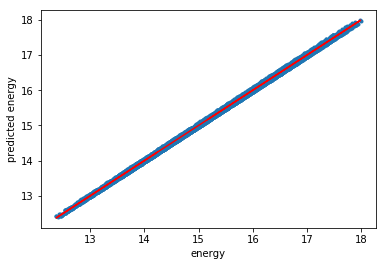

In [6]:
plt.xlabel(oname[7])
plt.ylabel("predicted energy")
plt.plot(energy, theta_best[0]+theta_best[1]*G1+theta_best[2]*G0, '.')
plt.plot(energy,energy,'r');

In [7]:
# error on prediction
error = energy - (theta_best[0]+theta_best[1]*G1+theta_best[2]*G0)

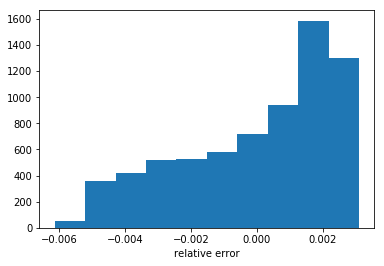

In [8]:
plt.hist(error / energy);
plt.xlabel("relative error");

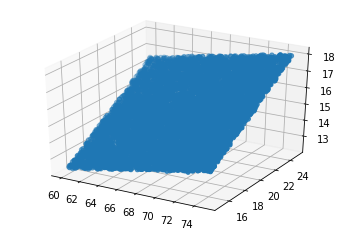

In [9]:
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the points.
ax.scatter(G0, G1, energy);